<a href="https://colab.research.google.com/github/SRegaard/Workshop-1./blob/main/Test_til_bp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!git clone https://github.com/SRegaard/BP2.git

fatal: destination path 'BP2' already exists and is not an empty directory.


In [40]:
import os
mappe_sti = "/content/BP2"

print("📄 Alle filer i mappen:")
for fil in os.listdir(mappe_sti):
    print(f"- {fil}")

📄 Alle filer i mappen:
- (2) Facebook (2.5.2025 22.58.53).html
- Facebook (8.5.2025 11.39.45).html
- Facebook (25.4.2025 13.43.46).html
- Facebook (28_04_2025 09.06.24).html
- Facebook (28_04_2025 09.03.31).html
- Facebook (28_04_2025 08.52.19).html
- (1) Facebook (28_04_2025 09.33.33).html
- (1) Facebook (29.4.2025 15.33.22).html
- Facebook (19_04_2025 12.03.26).html
- .git
- README.md
- Facebook (8.5.2025 11.40.48).html
- Facebook (21.4.2025 20.21.42).html
- Facebook (05_05_2025 09.13.45).html
- (1) Facebook (29.4.2025 15.42.05).html
- (5) Facebook (01_05_2025 21.38.32).html
- Facebook (19_04_2025 11.59.42).html
- Facebook (05_05_2025 09.15.26).html
- (5) Facebook (01_05_2025 21.35.14).html
- Facebook (28_04_2025 09.09.36).html


In [41]:
# Slet den gamle mappe (hvis den findes)
!rm -rf /content/BP2

# Klon den nyeste version af dit GitHub-repo
!git clone https://github.com/SRegaard/BP2.git

Cloning into 'BP2'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 59.19 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [42]:
# 📌 1. Klon dit GitHub-repo (kun første gang – spring over ved genstart)
!git clone https://github.com/SRegaard/BP2.git || echo "Repo already cloned"

# 📌 2. Installer nødvendige pakker
!pip install beautifulsoup4 lxml nltk networkx matplotlib

# 📌 3. Importér biblioteker
import os
from bs4 import BeautifulSoup
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# 📌 4. Download nødvendige NLTK-data
nltk.download('punkt')
nltk.download('stopwords')

fatal: destination path 'BP2' already exists and is not an empty directory.
Repo already cloned


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

✅ Antal ord efter stopordsfiltrering: 11251


<ipython-input-44-0a4f21f7e61b>:63: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


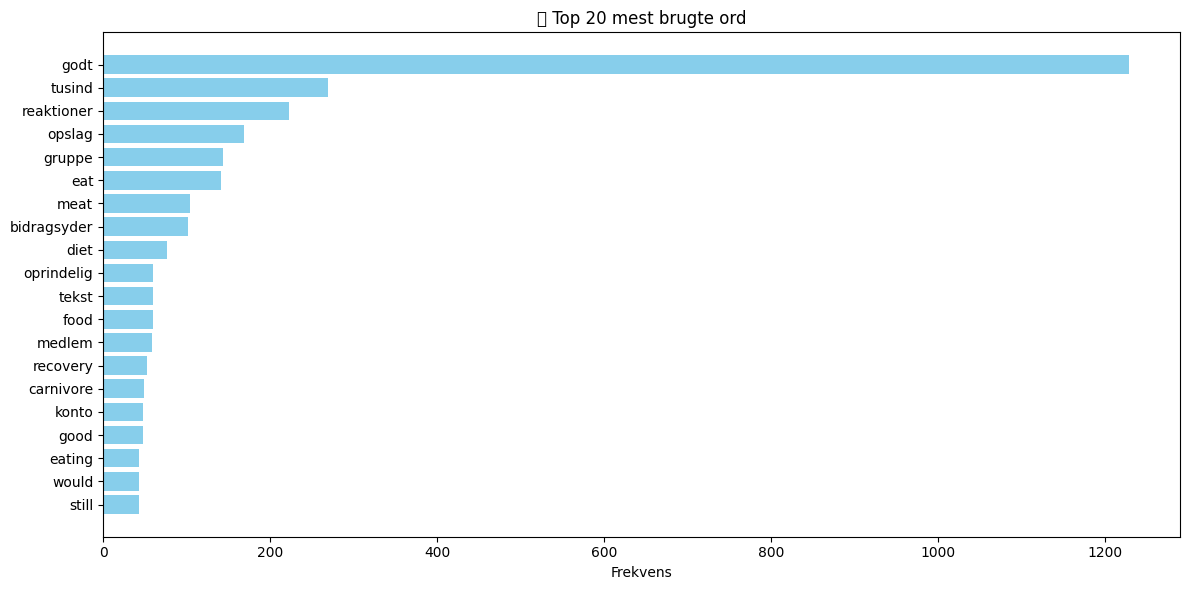

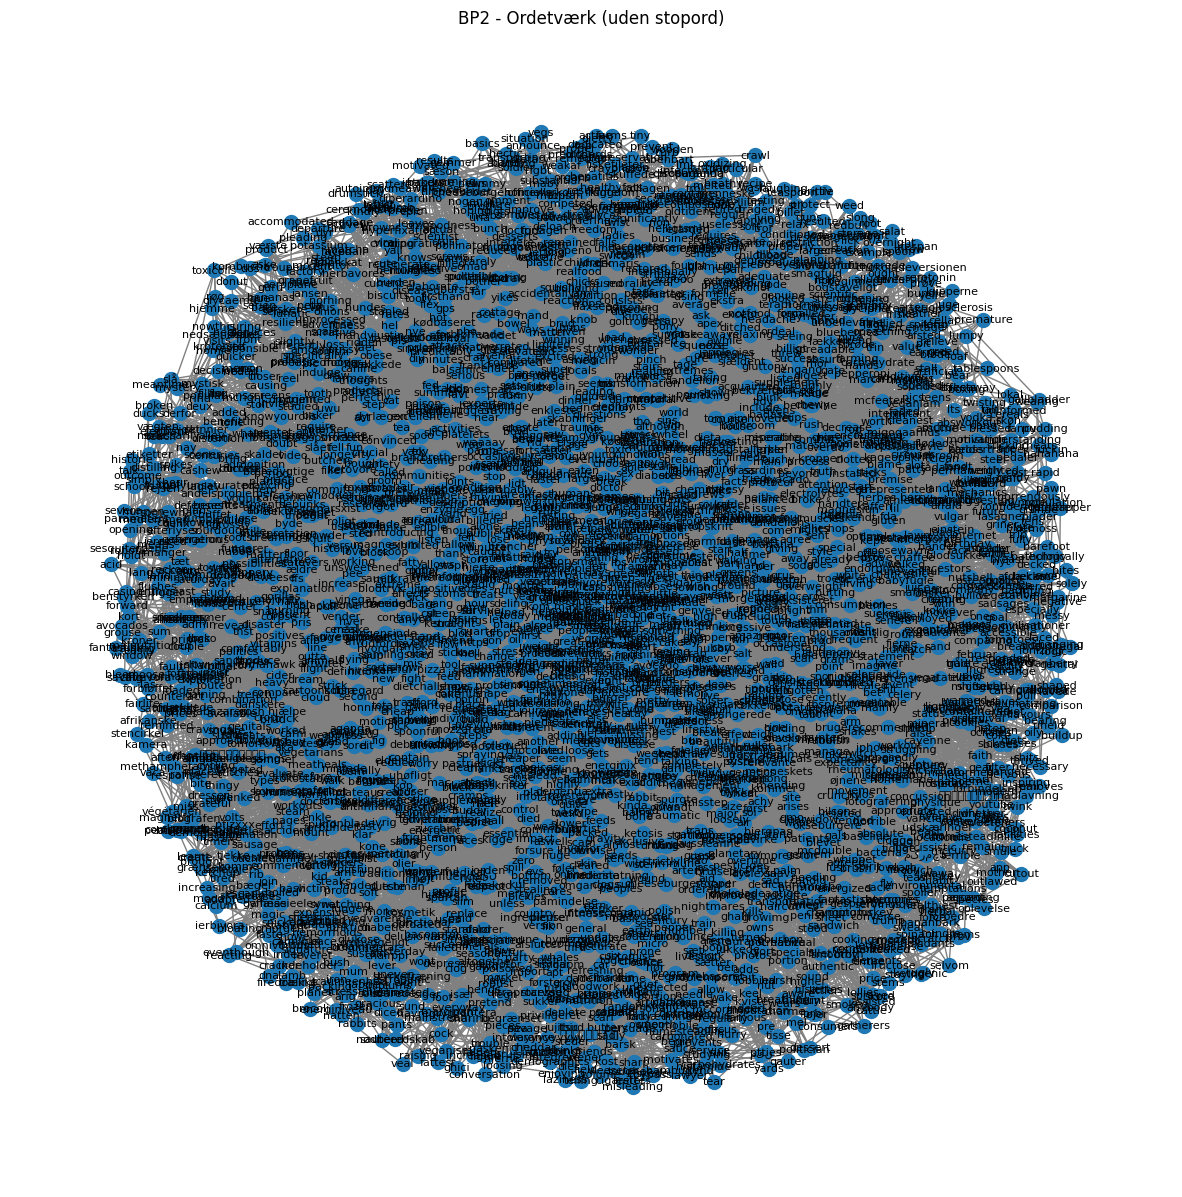

In [44]:
# 📌 5. Funktioner (med robust tokenizer + stopord på både dansk og engelsk)
tokenizer = TreebankWordTokenizer()

# Egne interface-ord fra Facebooks feed
interface_ord = {
    # Engelske interface-ord
    'like', 'likes', 'comment', 'comments', 'share', 'shares',
    'watch', 'views', 'follow', 'followers', 'following',
    'click', 'see', 'more', 'reply', 'others', 'see more', 'videos','settings','notifications'

    # Danske oversættelser
    'synes', 'synes godt om', 'kommentar', 'kommentarer', 'del', 'delinger',
    'se', 'visninger', 'følg', 'følger', 'følgere',
    'klik', 'mere', 'svar', 'andre', 'se mere', 'videoer', 'indstillinger','notifikationer','oversæt','oversættelse',

    #Reaktioner
    'aha', 'haha', 'lol', 'yay', 'hmm', 'huh', 'wow', 'omg', 'wtf', 'uff', 'øh', 'øv'
}

# Kombiner stopord: dansk, engelsk + interface
stopord = (set(stopwords.words('danish')) |
           set(stopwords.words('english')) |
           interface_ord)

def rens_og_tokeniser(tekst):
    tokens = tokenizer.tokenize(tekst)
    tokens = [ord for ord in tokens if ord.isalpha()]
    tokens = [ord.lower() for ord in tokens if not ord.istitle() and ord.lower() not in stopord]
    tokens = [ord for ord in tokens if len(ord) > 2]
    return tokens

def byg_ordnetvaerk(tokens, vindue=5):
    edges = defaultdict(int)
    for i in range(len(tokens) - vindue):
        vindue_ord = tokens[i:i+vindue]
        for i in range(len(vindue_ord)):
            for j in range(i+1, len(vindue_ord)):
                if vindue_ord[i] != vindue_ord[j]:
                    edges[(vindue_ord[i], vindue_ord[j])] += 1
    G = nx.Graph()
    for (ord1, ord2), vægt in edges.items():
        G.add_edge(ord1, ord2, weight=vægt)
    return G

def visualiser_netvaerk(G, titel="Ordetværk"):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=8, edge_color='gray')
    plt.title(titel)
    plt.axis('off')
    plt.show()

def vis_topord_søjlediagram(tokens, antal=20):
    # Optæl de mest brugte ord
    top_ord = Counter(tokens).most_common(antal)
    ord, frekvens = zip(*top_ord)

    # Lav søjlediagram
    plt.figure(figsize=(12, 6))
    plt.barh(ord[::-1], frekvens[::-1], color='skyblue')  # vend rækkefølgen for højeste øverst
    plt.xlabel("Frekvens")
    plt.title(f"🔝 Top {antal} mest brugte ord")
    plt.tight_layout()
    plt.show()

# 📌 6. Sti til dine HTML-filer i repoet
mappe_sti = "/content/BP2"

# 📌 7. Behandl alle HTML-filer
alle_tokens = []

for filnavn in os.listdir(mappe_sti):
    if filnavn.endswith('.html'):
        #print(f"🔍 Behandler fil: {filnavn}")
        filsti = os.path.join(mappe_sti, filnavn)
        tekst = udtraek_tekst_fra_html(filsti)
        tokens = rens_og_tokeniser(tekst)
        alle_tokens.extend(tokens)

print(f"✅ Antal ord efter stopordsfiltrering: {len(alle_tokens)}")

# 👇 Vis søjlediagram over de mest brugte ord
vis_topord_søjlediagram(alle_tokens, antal=20)

# 📌 8. Byg og vis ordnetværk
G = byg_ordnetvaerk(alle_tokens)
visualiser_netvaerk(G, titel="BP2 - Ordnetværk (uden stopord)")